<a href="https://colab.research.google.com/github/lahirurane/UTS_ML2019_A2/blob/master/UTS_ML2019_A2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment 2

In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
from wordcloud import WordCloud, ImageColorGenerator

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/My Drive/datasets



Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive/My Drive/datasets


Load Data

In [5]:
dataset = pd.read_csv('./amazon_alexa.tsv', delimiter='\t')
dataset.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


train data rating              2520
date                2520
variation           2520
verified_reviews    2520
feedback            2520
dtype: int64


,rating,date,variation,verified_reviews,feedback
2310,5,30-Jul-18,Configuration: Fire TV Stick,Just the perfect cost effective solution. Tha...,1
2189,5,30-Jul-18,Configuration: Fire TV Stick,I purchased the Fire Stick to be able to watch...,1
2304,2,30-Jul-18,Configuration: Fire TV Stick,"I’m very unhappy with this Firestick, every ti...",0
2988,4,30-Jul-18,White Dot,Handy if you don't expect much out of it much ...,1
221,4,29-Jul-18,Charcoal Fabric,"Good quality, great sound quality",1


In [0]:
dataset['review_item_length'] = dataset.verified_reviews.apply(lambda x: len(x))

Function to remove patters from text

In [0]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt 

punctuations, numbers and special characters do not help much

In [0]:
# remove special characters, numbers, punctuations
dataset['review_clear'] = dataset['verified_reviews'].str.replace("[^a-zA-Z#]", " ")

Lower case

In [0]:
dataset['review_clear'] = dataset.review_clear.apply(lambda x: x.lower())

In [57]:
data_train, data_test = train_test_split(dataset, test_size=0.2, random_state=42)
print("train data", data_train.count())
data_train.head()

train data rating                2520
date                  2520
variation             2520
verified_reviews      2520
feedback              2520
review_clear          2520
review_item_length    2520
dtype: int64


,rating,date,variation,verified_reviews,feedback,review_clear,review_item_length
2310,5,2018-07-30,Configuration: Fire TV Stick,Just the perfect cost effective solution. Tha...,1,just the perfect cost effective solution tha...,60
2189,5,2018-07-30,Configuration: Fire TV Stick,I purchased the Fire Stick to be able to watch...,1,i purchased the fire stick to be able to watch...,194
2304,2,2018-07-30,Configuration: Fire TV Stick,"I’m very unhappy with this Firestick, every ti...",0,i m very unhappy with this firestick every ti...,181
2988,4,2018-07-30,White Dot,Handy if you don't expect much out of it much ...,1,handy if you don t expect much out of it much ...,86
221,4,2018-07-29,Charcoal Fabric,"Good quality, great sound quality",1,good quality great sound quality,33


In [39]:
print('The mean for the length of review:',data_train['review_item_length'].mean())
print('The standard deviation for the length of reviews:',data_train['review_item_length'].std())
print('The maximum for the length of reviews:',data_train['review_item_length'].max())

The mean for the length of review: 133.70714285714286
The standard deviation for the length of reviews: 184.5839671195678
The maximum for the length of reviews: 2851


In [41]:
print("test data",data_test.count())
data_test.head()
#np.delete(data_test, np.s_[5], 1)

test data rating                630
date                  630
variation             630
verified_reviews      630
feedback              630
review_clear          630
review_item_length    630
dtype: int64


,rating,date,variation,verified_reviews,feedback,review_clear,review_item_length
2965,5,30-Jul-18,Black Dot,"Love it, we are still learning the capabilitie...",1,love it we are still learning the capabilitie...,69
969,5,29-Jul-18,Heather Gray Fabric,Very easy setup.,1,very easy setup,16
1385,5,17-Jul-18,Black Spot,,1,,1
1233,5,26-Jul-18,Black Spot,I purchased this on prime day mostly as a pres...,1,i purchased this on prime day mostly as a pres...,727
2996,5,30-Jul-18,White Dot,Fun and information. No dislikes so far !! ...,1,fun and information no dislikes so far ...,68


Text(0.5, 1.0, 'Distribution of review text length')

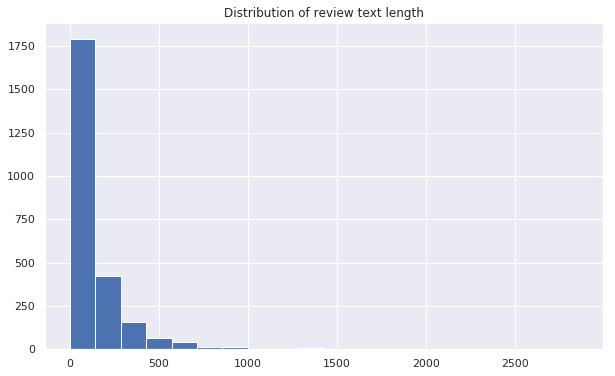

In [58]:
data_train['review_item_length'].hist(bins=20)
plt.title('Distribution of review text length')

In [0]:
data_train['date'] = data_train.date.apply(lambda x:  datetime.datetime.strptime(x, '%d-%b-%y'))

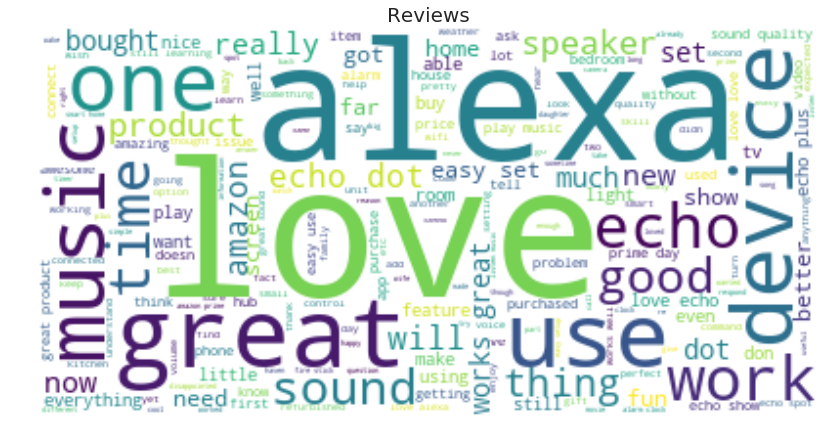

In [59]:
np.random.seed(321)
sns.set(rc={'figure.figsize':(14,8)})
reviews = ' '.join(data_train['review_clear'].tolist())

wordcloud = WordCloud(background_color="white").generate(reviews)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Reviews',size=20)
plt.show()

Text(0.5, 1.0, 'Counts of each variation')

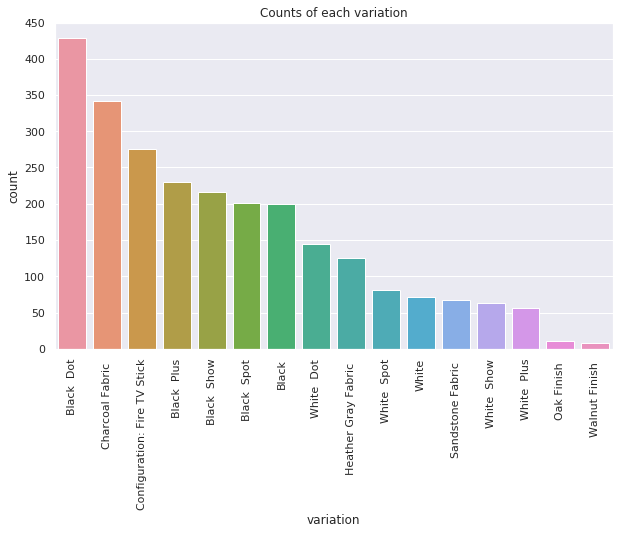

In [60]:
sns.set(rc={'figure.figsize':(10,6)})
sns.countplot(data_train.variation,
              order = data_train['variation'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Counts of each variation')

In [62]:
data_train.rating.value_counts()

5    1836
4     365
1     129
3     120
2      70
Name: rating, dtype: int64

In [0]:
data5 = data_train[data_train.rating == 5]
data_not_5 = data_train[data_train.rating != 5]
data1 = data_train[data_train.rating == 1]

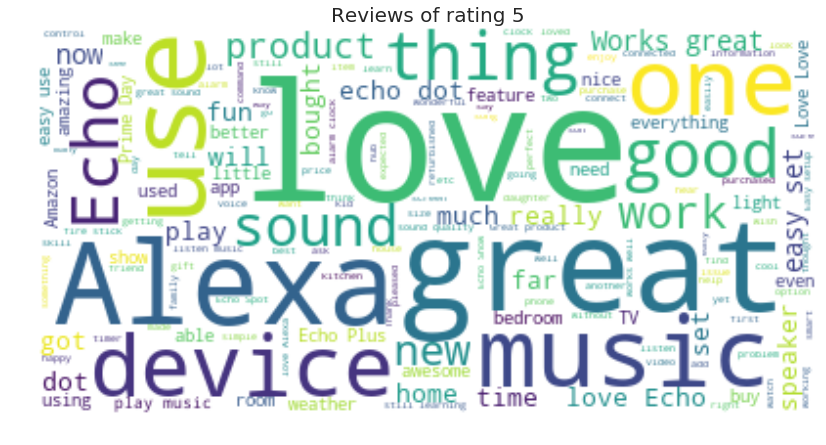

In [66]:
sns.set(rc={'figure.figsize':(14,8)})
reviews = ' '.join(data5['verified_reviews'].tolist())

wordcloud = WordCloud(background_color="white").generate(reviews)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Reviews of rating 5',size=20)
plt.show()

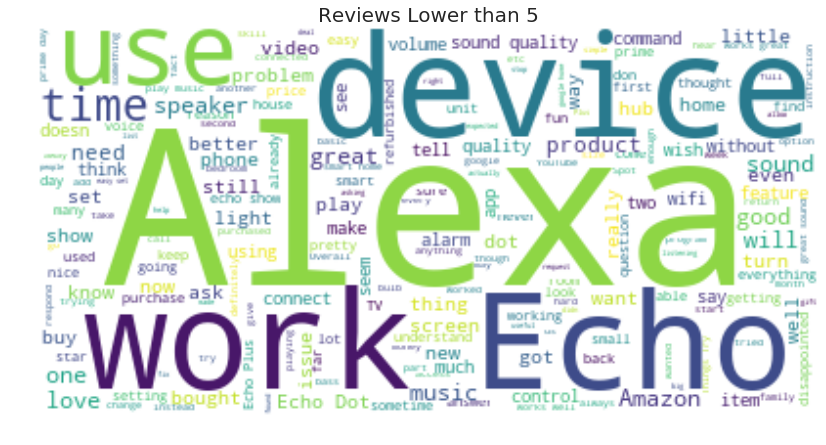

In [67]:
sns.set(rc={'figure.figsize':(14,8)})
reviews = ' '.join(data_not_5['verified_reviews'].tolist())

wordcloud = WordCloud(background_color="white").generate(reviews)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Reviews Lower than 5',size=20)
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

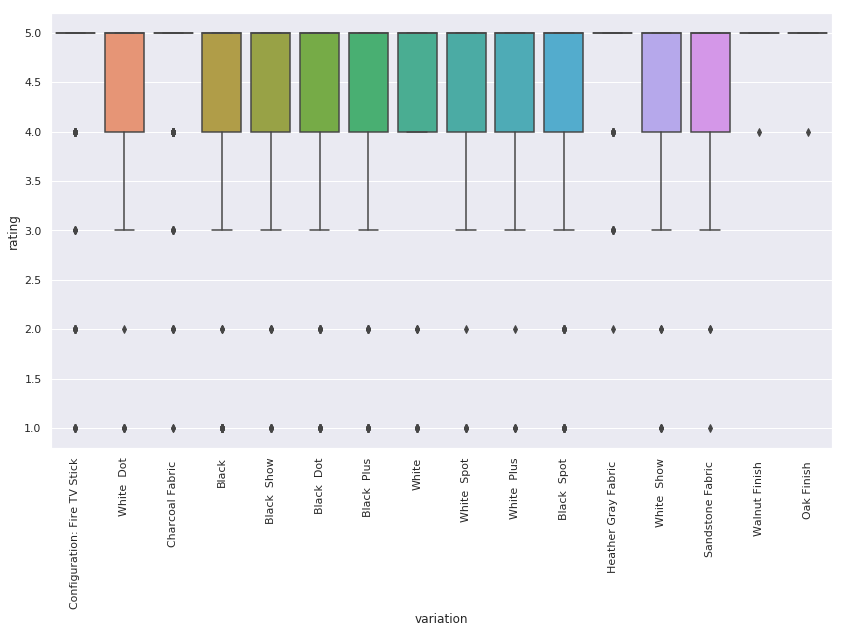

In [70]:
sns.boxplot(data_train.variation, data_train.rating)
plt.xticks(rotation = 90)

In [0]:
dataset['positive'] = 0
dataset.loc[dataset['rating'] ==5, 'positive'] = 1

y = dataset['positive']

In [80]:
from nltk.tokenize import word_tokenize 
import nltk
nltk.download('punkt')
nltk.download('stopwords')

word_tokenize(dataset.verified_reviews[0])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['Love', 'my', 'Echo', '!']

In [0]:
from nltk.corpus import stopwords 

stop_words = set(stopwords.words('english')) 

dataset['review_clear'] = dataset.verified_reviews.apply(lambda x: word_tokenize(x))

dataset['review_clear'] = dataset.review_clear.apply(lambda x: [w for w in x if w not in stop_words])

dataset['review_clear'] = dataset.review_clear.apply(lambda x: ' '.join(x))

In [85]:
dataset.head()

,rating,date,variation,verified_reviews,feedback,review_clear,review_item_length,positive
0,5,2018-07-31,Charcoal Fabric,Love my Echo!,1,Love Echo !,13,1
1,5,2018-07-31,Charcoal Fabric,Loved it!,1,Loved !,9,1
2,4,2018-07-31,Walnut Finish,"Sometimes while playing a game, you can answer...",1,"Sometimes playing game , answer question corre...",195,0
3,5,2018-07-31,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,I lot fun thing . My 4 yr old learns dinosaurs...,172,1
4,5,2018-07-31,Charcoal Fabric,Music,1,Music,5,1


In [86]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 8 columns):
rating                3150 non-null int64
date                  3150 non-null datetime64[ns]
variation             3150 non-null object
verified_reviews      3150 non-null object
feedback              3150 non-null int64
review_clear          3150 non-null object
review_item_length    3150 non-null int64
positive              3150 non-null int64
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 197.0+ KB


In [88]:
import spacy
nlp = spacy.load('en')

def explain_text_entities(text):
    doc = nlp(text)
    for ent in doc.ents:
        print(f'Entity: {ent}, Label: {ent.label_}, {spacy.explain(ent.label_)}')
        
for i in range(15, 50):
    one_sentence = dataset['verified_reviews'][i]
    doc = nlp(one_sentence)
    spacy.displacy.render(doc, style='ent',jupyter=True)

/usr/lib/python3.6/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


/usr/lib/python3.6/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


/usr/lib/python3.6/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


/usr/lib/python3.6/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


/usr/lib/python3.6/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


/usr/lib/python3.6/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


/usr/lib/python3.6/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


/usr/lib/python3.6/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


/usr/lib/python3.6/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


/usr/lib/python3.6/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


/usr/lib/python3.6/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


/usr/lib/python3.6/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


/usr/lib/python3.6/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


/usr/lib/python3.6/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


/usr/lib/python3.6/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


/usr/lib/python3.6/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


In [0]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(dataset['review_clear'])


In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(dataset['review_clear'])


In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

train_bow = bow[:31962,:]
test_bow = bow[31962:,:]

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, dataset['feedback'], random_state=42, test_size=0.3)

lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain) # training the model

prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int) # calculating f1 score

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9585666293393056